In [2]:
import sys
import os
from pathlib import Path

PROJ_NAME = "optimal-stopping"

# Locate the Project directory
curr_dir = str(Path.cwd())
start = curr_dir.find(PROJ_NAME)
if start < 0:
    print("ERROR: Project directory not found")
    print("Make sure you have the correct project structure")
    print("and run the simulation from within the project")
proj_pathname = curr_dir[:(start+len(PROJ_NAME))]

# Create path to the project directory
proj_path = Path(proj_pathname)

# Add the project folder to PATH
sys.path.append(proj_pathname)

In [3]:
import numpy as np
from scipy import stats
from bin.result_processing import loadFile

import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import numpy as np

from scipy.interpolate import make_interp_spline, BSpline

In [4]:
results_path = Path(proj_path/"results/raw_data")
files = os.listdir(results_path)

policies = ['policyE', 'policyN', 'policyC', 'policyA', 'policyR', 'policyOST', 'policyM']

In [5]:
d1_data_r3 = {}
d1_data_r5 = {}
d2_data_pi3 = {}
d2_data_pi4 = {}

for filename in files:
    if filename[:7]=='results':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            comm = result.comm
            if result.sensor_name=="R3":
                d1_data_r3[result.policyName] = comm
            elif result.sensor_name=="R5":
                d1_data_r5[result.policyName] = comm
            elif result.sensor_name=="pi3":
                d2_data_pi3[result.policyName] = comm
            elif result.sensor_name=="pi4":
                d2_data_pi4[result.policyName] = comm

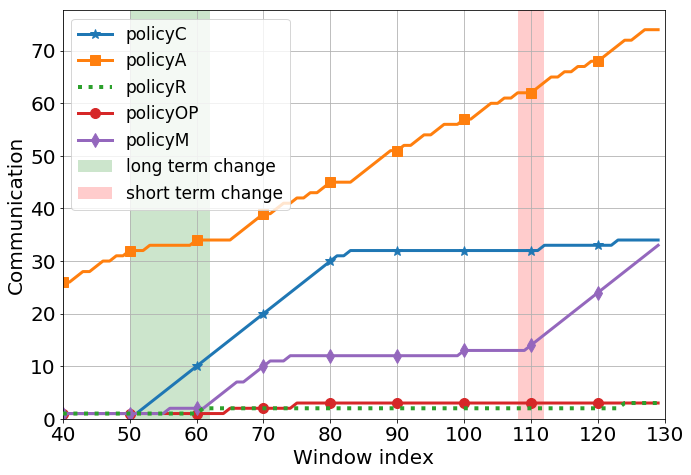

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.grid(True)

ax.tick_params(axis="y")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
ax.axvspan(50, 62, facecolor='g', alpha=0.2, label="long term change")
ax.axvspan(108, 112, facecolor='r', alpha=0.2, label="short term change")

S="R5"
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
i=0

for policy in policies:
    if policy != "policyE" and policy != "policyN":
        comm = d1_data_r5[policy][40:130]
        x = np.arange(40,40+len(comm))
        if policy == "policyR":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=4, markersize=10, markevery=10, zorder=10)
        elif policy=="policyOST":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
        else:
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
        i += 1

plt.xlim(left=40)
plt.ylim(bottom=0)
plt.xlim(right=130)
plt.rc('font', size = 20)

plt.xlabel("Window index")
ax.set_ylabel("Communication")

# plt.title("Communication for HT sensor system,"+ \
#     " s="+ S + ", w="+str(W)+\
#     ",\nusing Support Vector Regression with RBF"+\
#     " Kernel given\n an artificial change at 50th window iteration")
plt.legend(loc='best', prop={'size': 17})


plt.tight_layout()

plt.show()

R3


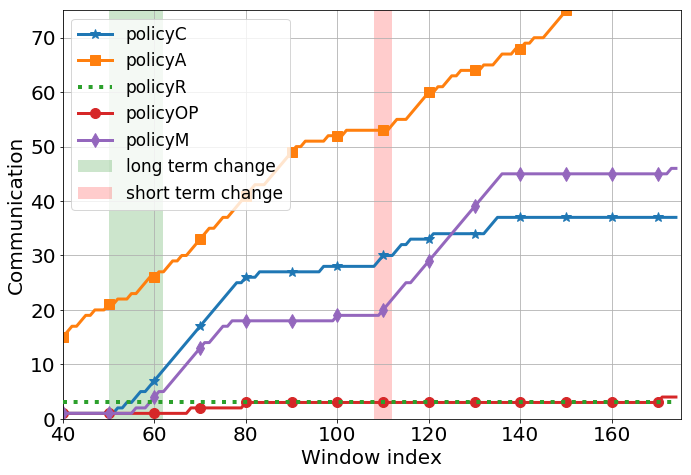

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
ax.grid(True)

ax.tick_params(axis="y")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))
ax.axvspan(50, 62, facecolor='g', alpha=0.2, label="long term change")
ax.axvspan(108, 112, facecolor='r', alpha=0.2, label="short term change")

S="R3"
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
i=0

for policy in policies:
    if policy != "policyE" and policy != "policyN":
        comm = d1_data_r3[policy][40:175]
        x = np.arange(40,40+len(comm))
        if policy == "policyR":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=4, markersize=10, markevery=10, zorder=10)
        elif policy=="policyOST":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
        else:
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
        i += 1

plt.xlim(left=40)
plt.ylim(bottom=0)
plt.ylim(top=75)
plt.xlim(right=175)
plt.rc('font', size = 20)

plt.xlabel("Window index")
ax.set_ylabel("Communication")

# plt.title("Communication for HT sensor system,"+ \
#     " s="+ S + ", w="+str(W)+\
#     ",\nusing Support Vector Regression with RBF"+\
#     " Kernel given\n an artificial change at 50th window iteration")
plt.legend(loc='best', prop={'size': 17})


plt.tight_layout()
print(S)
plt.show()

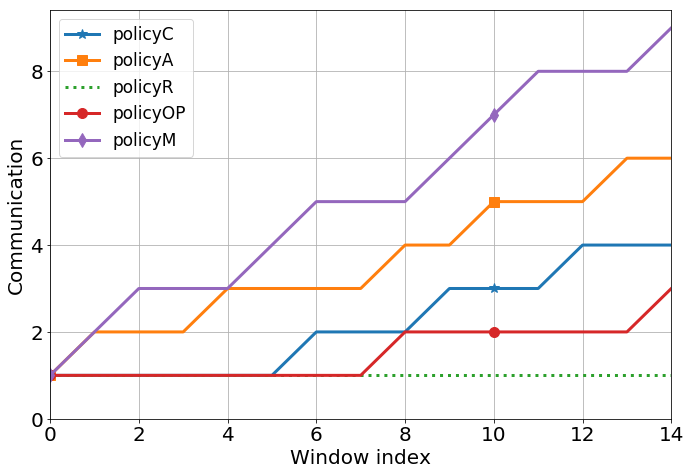

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
ax.grid(True)
ax.tick_params(axis="y")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))

S="pi3"
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
i=0

for policy in policies:
    if policy != "policyE" and policy != "policyN":
        comm = d2_data_pi3[policy][:15]
        x = np.arange(0,len(comm))
        if policy=="policyOST":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
        else:
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
        i += 1

plt.xlim(left=0)
plt.xlim(right=len(comm)-1)
plt.ylim(bottom=0)

plt.xlabel("Window index")
ax.set_ylabel("Communication")
# plt.title("Communication for SUV sensor ["+S+\
#     "], w="+str(W)+",\nusing Linear Regression")
plt.legend(loc='best', prop={'size': 17})
plt.tight_layout()

plt.show()

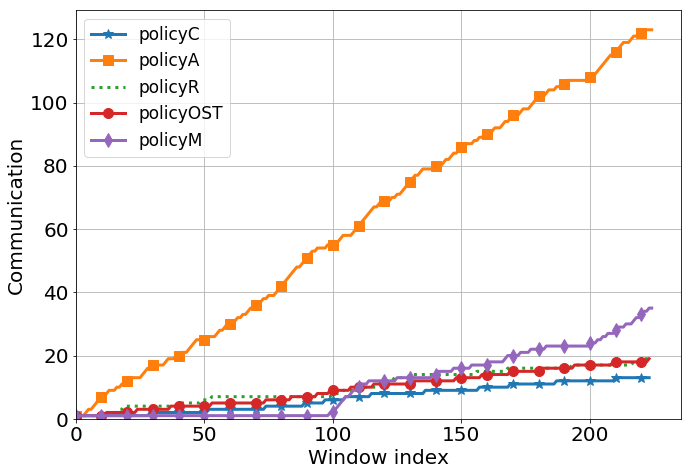

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.grid(True)
ax.tick_params(axis="y")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:g}".format(x)))

S="pi4"
W = 25
linestyles = ['*-','s-',':', 'o-','d-']
i=0

for policy in policies:
    if policy != "policyE" and policy != "policyN":
        comm = d2_data_pi4[policy][:]
        x = np.arange(0,len(comm))
        if policy=="policyOST":
            ax.plot(x, comm, linestyles[i], fillstyle='full', label="policyOP", linewidth=3, markersize=10, markevery=10)
        else:
            ax.plot(x, comm, linestyles[i], fillstyle='full', label=policy, linewidth=3, markersize=10, markevery=10)
        i += 1

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel("Window index")
ax.set_ylabel("Communication")
# plt.title("Communication for SUV sensor ["+S+\
#     "], w="+str(W)+",\nusing Linear Regression")
plt.legend(loc='best', prop={'size': 17})
plt.tight_layout()

plt.show()